In [70]:
import pandas as pd
import numpy as np
import ProduceMasks_noparallel_3 as mask
import ProduceMasks_noparallel_2 as mask2
from PIL import Image


In [71]:
Ade_subset = pd.read_csv("../Ade20K_labels/Ade20K_labels.txt")

In [72]:
Ade_cat = Ade_subset.loc[Ade_subset.object == 'beacon',:].reset_index()

In [73]:
Ade_file = Ade_cat.loc[Ade_cat['filename'] == 'ADE_train_00011050'].reset_index()

In [74]:
Ade_file['filepath'][0]

'../ADE20K/ADE20K_2016_07_26/images/training/l/lighthouse'

In [75]:
def makeDict_pd(p):
    path = p['filepath']+'/'+p['filename']
    s={}
    s['filepath'] = path[0]
    s['category'] = p.object[0]
    return s

In [76]:
def makeDict(p):
    path = p.filepath+'/'+p.filename
    s={}
    s['filepath'] = path
    s['category'] = p.object
    return s

In [77]:
s = makeDict_pd(Ade_file)

Building mask for ../ADE20K/ADE20K_2016_07_26/images/training/l/lighthouse/ADE_train_00011050
here1 b
here2 b
here 3b a b
filepath ['training', 'l', 'lighthouse', 'ADE_train_00011050']
SaveMaskPath ../masks-ade-3/sceneConvexHullOnly/training/l/lighthouse


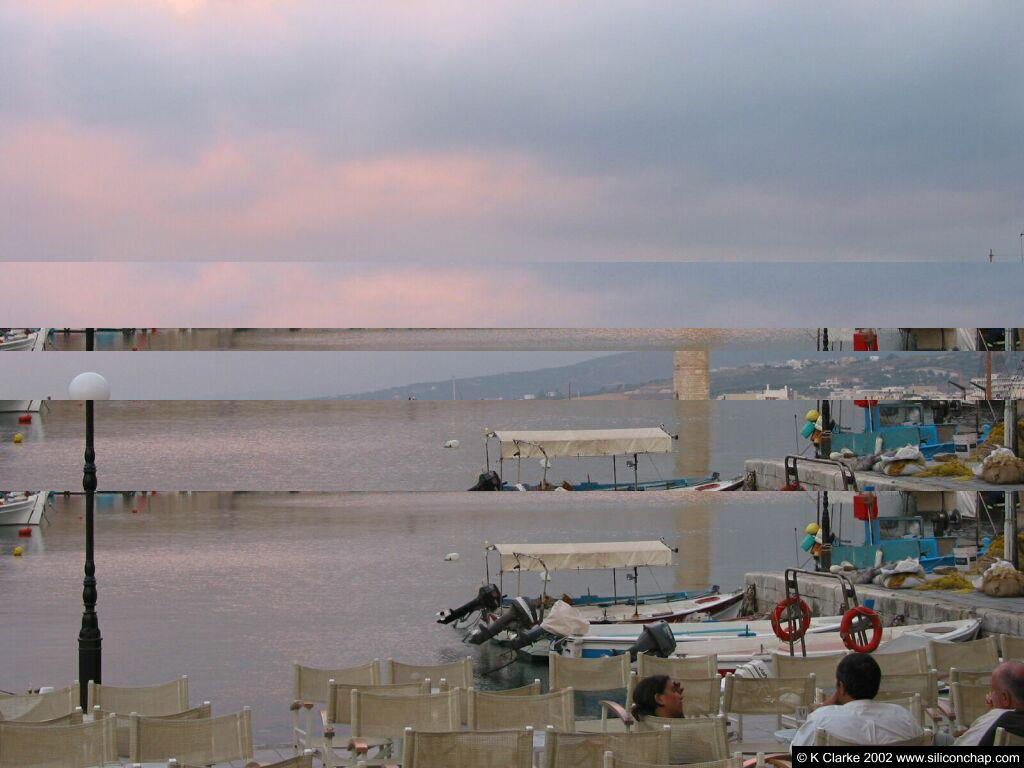

In [78]:
mask.create_mask_horizontalband(s)

In [79]:
atrfile = pd.read_csv(s['filepath']+'_atr.txt', sep=' # ', header=None,index_col=4,engine = 'python')

In [80]:
atrfile

0  1  2                                                  3   5
4                                                                            
sky            1  0  0                                                sky  ""
ground         2  0  0                                      earth, ground  ""
water          3  0  0                                              water  ""
seats          4  0  0                                               seat  ""
lighthouse     5  0  0           beacon, lighthouse, beacon light, pharos  ""
land           6  0  0                                 land, ground, soil  ""
boats          7  0  0                                               boat  ""
ship           8  0  0                                               ship  ""
boats          9  0  0                                               boat  ""
buildings     10  0  0                                  building, edifice  ""
boats         11  0  0                                               boat  ""
person        12  0  0  person, individual, someone, somebody, mortal,...  ""
street light  13  0  0                           streetlight, street lamp  ""
person        14  0  0  person, individual, someone, somebody, mortal,...  ""
person        15  0  0  person, individual, someone, somebody, mortal,...  ""
boat          16  0  0                                               boat  ""
boat          17  0  0                                               boat  ""
boat          18  0  0                                               boat  ""
boat          19  0  0                                               boat  ""

In [81]:
atrfile[atrfile.iloc[:,1]==0].iloc[:,0].max()

19

In [82]:
image_mask = Image.open(s['filepath']+'_seg.png').convert('RGB')
image_mask = np.array(image_mask)

In [83]:
import matplotlib.pyplot as plt


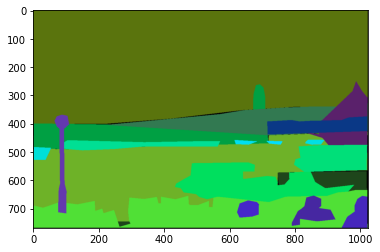

In [84]:
plt.imshow(image_mask,aspect="auto")
plt.show()

In [85]:
u,Ind,Inv = np.unique(image_mask[:, :, 2],return_index=True, return_inverse=True)
ObjectInstanceMasks = np.reshape(Inv,(image_mask.shape[0], image_mask.shape[1]))

In [86]:
np.max(ObjectInstanceMasks) != np.max(atrfile[atrfile.iloc[:,1]==0].iloc[:,0])

False

In [87]:
ObjectInstanceMasks.shape

(768, 1024)

In [88]:
new_mask_instance = np.repeat(ObjectInstanceMasks[:, :, np.newaxis], 3, axis=2)
new_mask_instance.shape

(768, 1024, 3)

In [89]:
new_mask = np.zeros((image_mask.shape[0], image_mask.shape[1]))
new_mask = np.repeat(new_mask[:, :, np.newaxis], 3, axis=2)
new_mask[new_mask_instance==[5]] = 255.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


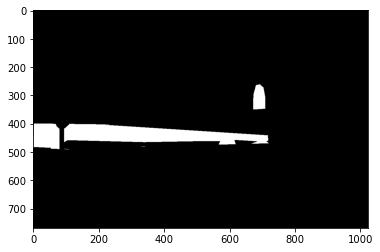

In [90]:
plt.imshow(new_mask,aspect="auto")
plt.show()

In [141]:
len(new_mask_instance[new_mask_instance==[13]])

0

In [142]:

image_mask[new_mask_instance == 0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [143]:
atrfile.loc['lighthouse',0].astype('int8')

6

whole_len 160
idx length 233
indices length 159


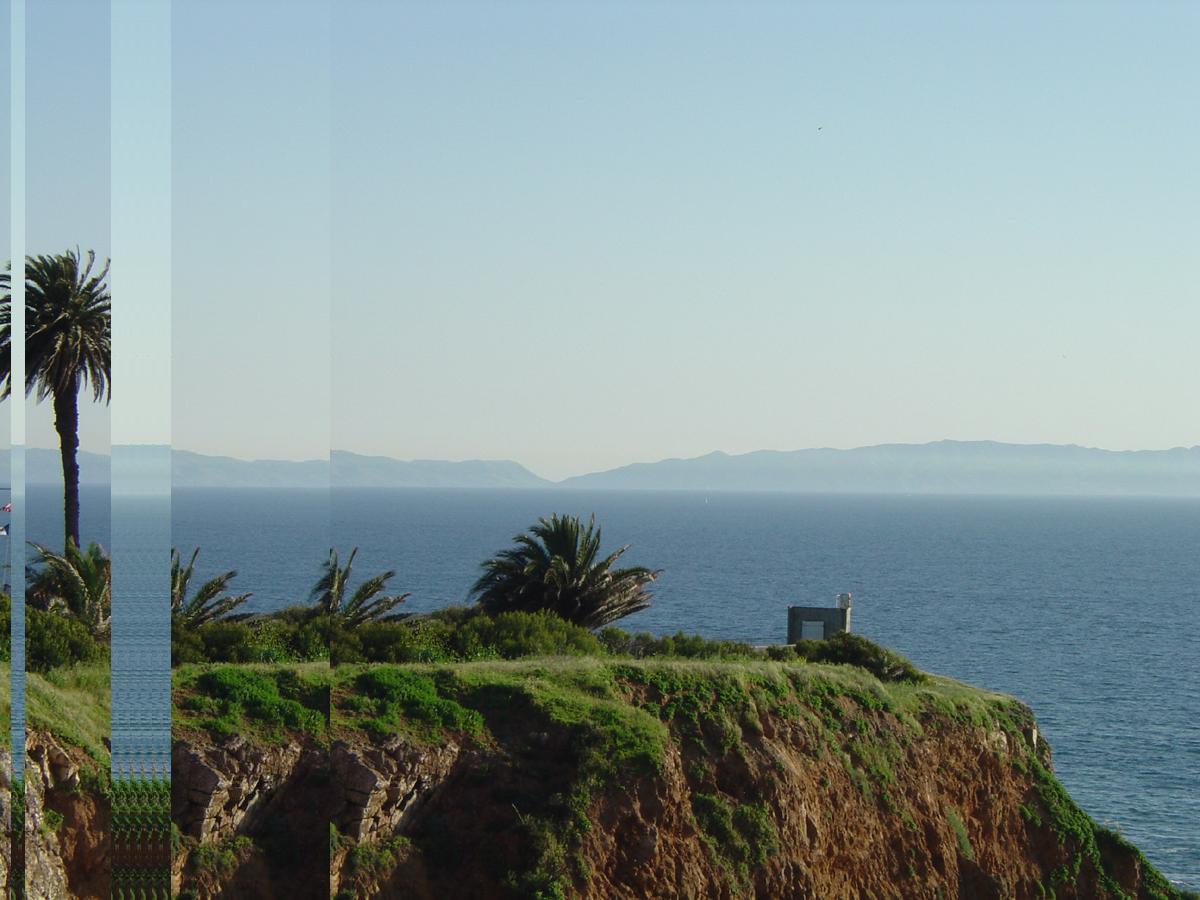

cat not found, looking at atr file for:  beacon
ThisCat:  building
ThisCat:  ground
ThisCat:  lighthouse
correct index was lighthouse
mask_values 6


array([[1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 0, 0],
       ...,
       [2, 2, 2, ..., 6, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

checking mask_values 6


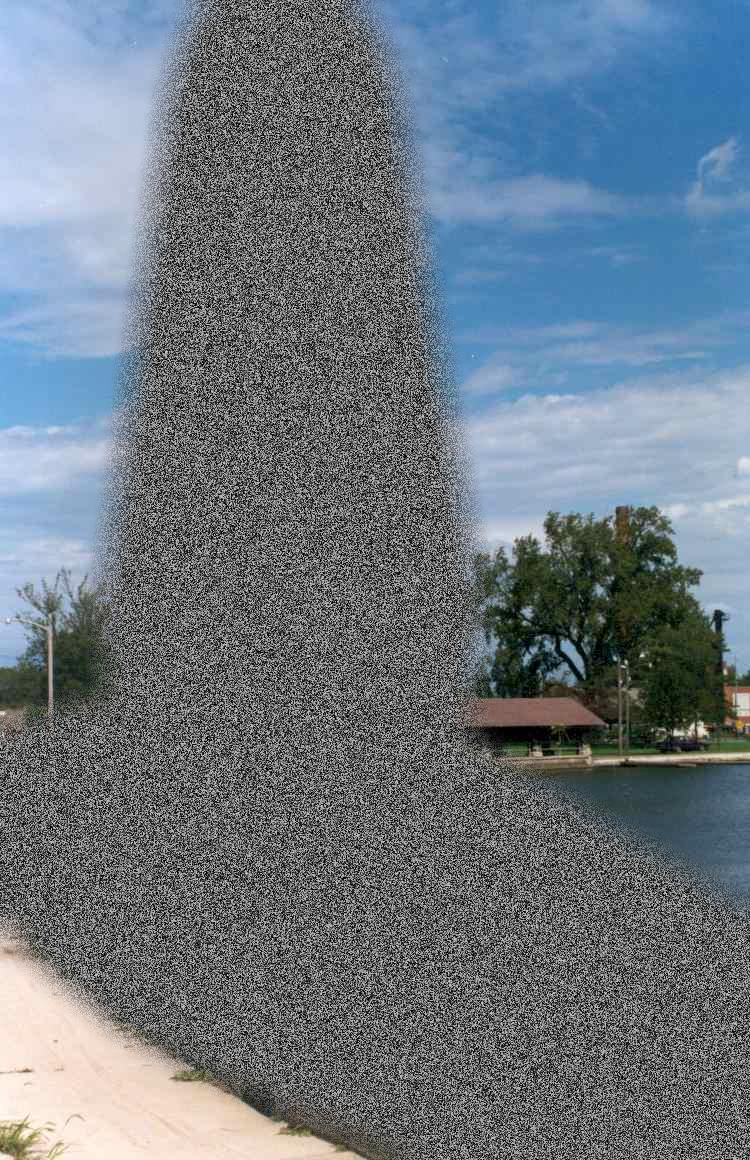

In [144]:
mask2.create_mask_ade_random(s)

In [ ]:
for i in Ade_cat.iterrows():
    mask.create_mask_ade_random(makeDict(i[1]),masktype='object')

In [ ]:
np.abs(-2)